## NASA - Objetos Cercanos a la Tierra
#### Análisis de asteroides que andan circulando por ahí y que podrían liarla muy parda.
(Datos obtenidos de [aquí](https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects))

Sonando: [Metallica - Hardwired... To Self-Destruct](https://www.metallica.com/releases/albums/release-4878.html)

In [1]:
import numpy as np
import pandas as pd

In [2]:
file = 'nasa_objects_near_earth.csv' #Para más comodidad, he dejado el .csv en este mismo directorio
df_objects = pd.read_csv(file)

df_objects.set_index('id', inplace=True)

df_objects.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
id,,,,,,,,,
2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


Evaluemos si hay datos faltantes:

In [3]:
missingdata = df_objects.isnull()
columnas = missingdata.columns.values.tolist()

for c in columnas:
    print(c)
    print(missingdata[c].value_counts())
    print('')

name
False    90836
Name: name, dtype: int64

est_diameter_min
False    90836
Name: est_diameter_min, dtype: int64

est_diameter_max
False    90836
Name: est_diameter_max, dtype: int64

relative_velocity
False    90836
Name: relative_velocity, dtype: int64

miss_distance
False    90836
Name: miss_distance, dtype: int64

orbiting_body
False    90836
Name: orbiting_body, dtype: int64

sentry_object
False    90836
Name: sentry_object, dtype: int64

absolute_magnitude
False    90836
Name: absolute_magnitude, dtype: int64

hazardous
False    90836
Name: hazardous, dtype: int64



Vale; pues tenemos 90.836 filas y no hay valores nulos, lo cual está muy bien.
Veamos ahora si los datos de la tabla tienen el formato correcto:

In [4]:
df_objects.dtypes

name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

¡Perfecto! Con _datasets_ así da gusto trabajar, oye.
Veamos ahora el conjunto de estadísticas para los datos numéricos:

In [5]:
df_objects.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [6]:
print(df_objects['orbiting_body'].value_counts())
print(df_objects['sentry_object'].value_counts())

Earth    90836
Name: orbiting_body, dtype: int64
False    90836
Name: sentry_object, dtype: int64


Todos los objetos orbitan la Tierra y tienen el valor de 'sentry_object' como False, así que podemos prescindir de ambas columnas:

In [7]:
df_objects.drop(['orbiting_body', 'sentry_object'], axis=1, inplace=True)
df_objects.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,,,,,,,
2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


De igual forma, podemos establecer una única magnitud para el tamaño; pongamos la media del diámetro mayor y menor para cada objeto:

In [8]:
df_objects['size'] = (df_objects['est_diameter_min']+df_objects['est_diameter_max'])/2
df_objects.drop(['est_diameter_min', 'est_diameter_max'], axis=1, inplace=True)
df_objects.head()

,name,relative_velocity,miss_distance,absolute_magnitude,hazardous,size
id,,,,,,
2162635,162635 (2000 SS164),13569.249224,5.483974e+07,16.73,False,1.938843
2277475,277475 (2005 WK4),73588.726663,6.143813e+07,20.00,True,0.430073
2512244,512244 (2015 YE18),114258.692129,4.979872e+07,17.83,False,1.168268
3596030,(2012 BV13),24764.303138,2.543497e+07,22.20,False,0.156150
3667127,(2014 GE35),42737.733765,4.627557e+07,20.09,True,0.412613


¿Cuántos de esos 90.836 objetos suponen algún peligro, según la NASA?

In [9]:
df_objects['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

Vamos a conocer mejor a nuestros potenciales causantes de extinciones masivas. Comprobemos si el tamaño y la velocidad relativa a la Tierra tienen algo que ver:

<AxesSubplot:xlabel='size', ylabel='relative_velocity'>

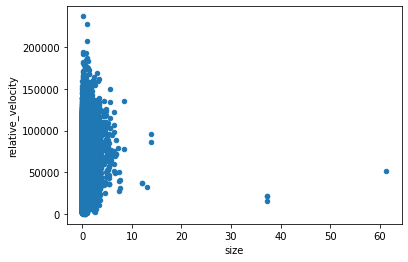

In [10]:
df_objects.plot(kind='scatter', x='size', y='relative_velocity')

Consideremos ahora sólo los "peligrosos":

In [11]:
df_hazardous = df_objects[df_objects['hazardous'] == True]
df_hazardous

,name,relative_velocity,miss_distance,absolute_magnitude,hazardous,size
id,,,,,,
2277475,277475 (2005 WK4),73588.726663,6.143813e+07,20.00,True,0.430073
3667127,(2014 GE35),42737.733765,4.627557e+07,20.09,True,0.412613
54049873,(2020 OT6),58430.697200,3.833750e+07,20.11,True,0.408830
2506491,506491 (2003 UW29),115899.180498,1.510102e+07,20.60,True,0.326244
3781344,(2017 RV),48655.305132,3.279775e+07,21.90,True,0.179284
...,...,...,...,...,...,...
3776295,(2017 NH),67595.756852,5.681059e+07,21.50,True,0.215547
54235530,(2022 AY1),51149.696785,5.450002e+07,22.02,True,0.169646
2138404,138404 (2000 HA24),33008.617883,7.189835e+07,19.36,True,0.577488


Veamos ahora cómo se compara el tamaño de los objetos potencialmente peligrosos con otros valores: la velocidad relativa y la distancia:

<AxesSubplot:xlabel='size', ylabel='relative_velocity'>

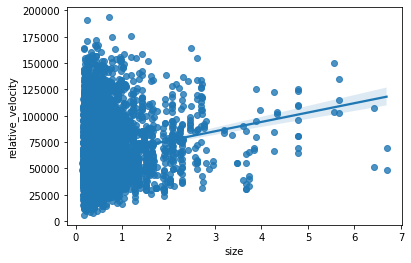

In [12]:
import seaborn as sns
sns.regplot(x='size', y='relative_velocity', data=df_hazardous)

<AxesSubplot:xlabel='size', ylabel='miss_distance'>

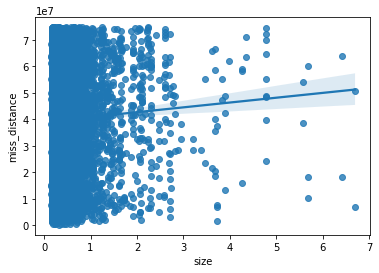

In [13]:
sns.regplot(x='size', y='miss_distance', data=df_hazardous)

Vamos a comparar ahora los peligrosos y los no peligrosos:

<AxesSubplot:xlabel='hazardous', ylabel='miss_distance'>

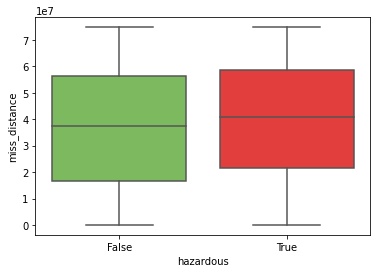

In [14]:
colors = ['#78C850', '#FF2222']
sns.boxplot(x='hazardous', y='miss_distance', data=df_objects, palette=colors)

<AxesSubplot:xlabel='hazardous', ylabel='relative_velocity'>

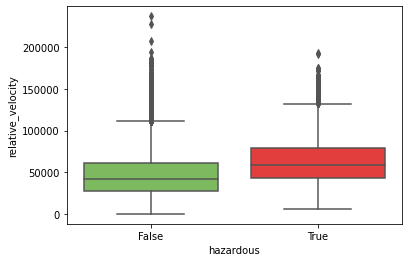

In [15]:
sns.boxplot(x='hazardous', y='relative_velocity', data=df_objects, palette=colors)

<AxesSubplot:xlabel='hazardous', ylabel='size'>

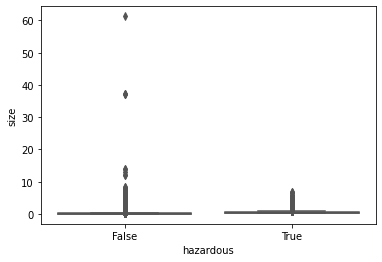

In [16]:
sns.boxplot(x='hazardous', y='size', data=df_objects, palette=colors)

De lo visto, parece que hay _algo_ más de probabilidad de que un objeto sea peligroso con una mayor velocidad relativa, pero que al final esto es una lotería cósmica, oye.